In [713]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## 1. Importe la base de datos a una base en Jupyter Notebook con pandas.

In [714]:
df=pd.read_csv("Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [715]:
df.rename({'Store':'Tienda', 'Date': 'fecha','Weekly_Sales':'VentasSemanales','Holiday_Flag':'SemanaEspecial','Temperature':'Temperatura','Fuel_Price':'PrecioCombustible','CPI':'IPC','Unemployment':'Desempleo'}, axis=1, inplace=True)
df

,Tienda,fecha,VentasSemanales,SemanaEspecial,Temperatura,PrecioCombustible,IPC,Desempleo
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


## VARIABLES DUMMIES FECHA

In [716]:
df_dummies = pd.get_dummies(df, columns=['fecha'], dummy_na=True)


## 2. Obtenga los descriptivos resumen de la base de datos e identifique a las variables numéricas y categóricas. ¿Hay algo que le llame la atención?
La variable SemanaEspecial parece indicar si una semana es especial o no. La mayoría de las semanas tienen un valor de 0, lo que sugiere que las semanas especiales son menos comunes en los datos.

Las variables Temperatura, PrecioCombustible, IPC y Desempleo muestran una variación considerable en sus valores. Esto podría indicar que estas variables tienen un impacto en las ventas semanales y podrían ser importantes para el análisis.

Los valores extremos en algunas de las variables, como la temperatura mínima (-2.06) y la tasa de desempleo máxima (14.313), podrían requerir un análisis adicional para comprender su impacto en las ventas.

In [717]:
df.describe()

,Tienda,VentasSemanales,SemanaEspecial,Temperatura,PrecioCombustible,IPC,Desempleo
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


## 4.Evalúe si alguna de las variables contiene datos atípicos (outliers) De ser el caso, detalle cuáles y qué método estadístico aplicarán para corregir
En términos generales, estos descriptivos proporcionan una visión general de LOS datos. Algunos puntos de atención podrían incluir la presencia de valores negativos en la temperatura (que podrían ser errores de medición) y la amplia variabilidad en las ventas semanales y otras variables.

Método estadístico
la imputación predictiva. Se utilizó modelos de regresión  para predecir valores válidos para los casos con valores negativos basados en otras características del conjunto de datos. 

## 3. Evalúe si la base contiene datos perdidos.
No hay datos perdidos en la base. La columna "Tienda" tiene 0 valores faltantes, al igual que las otras columnas, incluyendo "fecha", "VentasSemanales", "SemanaEspecial", "Temperatura", "PrecioCombustible", "IPC" y "Desempleo". Todos los valores tienen recuentos de 0 faltantes (NaN).

In [718]:
df.isna().sum()

Tienda               0
fecha                0
VentasSemanales      0
SemanaEspecial       0
Temperatura          0
PrecioCombustible    0
IPC                  0
Desempleo            0
dtype: int64

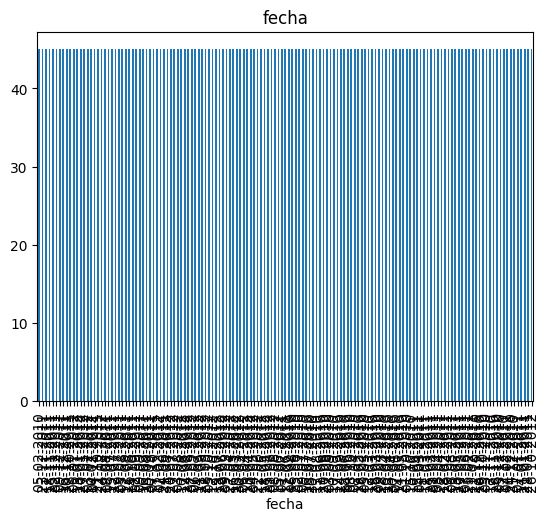

In [719]:
for i in df.select_dtypes(["object"]).columns:
    if df[i].dtype=="object":
          df[i].value_counts().plot(kind='bar', title=str(i))
plt.show()

## 5. Grafique las distribuciones de las variables y a priori comente sobre ellas.

Grupo 1:Las variables en este grupo están muy agrupadas y no muestran valores atípicos. Esto sugiere que los datos en este grupo tienen una distribución bastante uniforme y que la mayoría de las observaciones caen dentro de un rango similar.
Esto podría indicar que las variables en este grupo tienen una baja variabilidad y que las observaciones son consistentes en su comportamiento.

Grupo 2:Al igual que en el Grupo 1, las variables en este grupo también están muy agrupadas y no muestran valores atípicos. Esto sugiere una distribución uniforme de los datos en este grupo.
Al igual que en el Grupo 1, esto podría indicar baja variabilidad y consistencia en el comportamiento de las observaciones.

Grupo 3:Una vez más, los datos en este grupo están muy agrupados y no muestran valores atípicos. La distribución uniforme es evidente en este grupo.
Esto sugiere baja variabilidad y consistencia en las observaciones dentro de este grupo.

No se observan valores atípicos y los datos están muy agrupados en los gráficos de distribución, esto indica que las variables en cada grupo tienen comportamientos predecibles y estables.

In [721]:
x = df['IPC']
y = df['VentasSemanales']

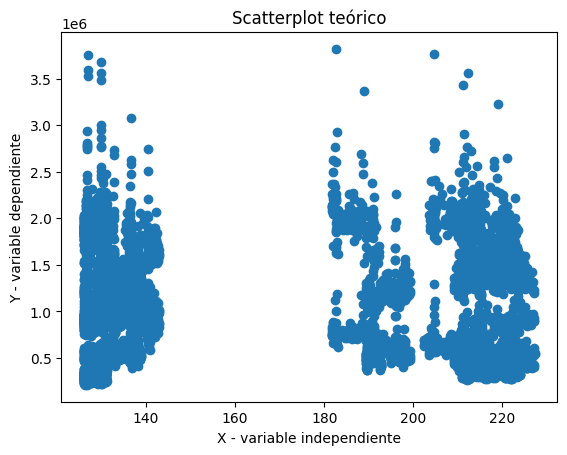

In [722]:
plt.scatter(x, y)
plt.title('Scatterplot teórico')
plt.xlabel('X - variable independiente')
plt.ylabel('Y - variable dependiente')
plt.show()

## 6. Obtenga las correlaciones entre los datos de corte numérico.

In [723]:
df.corr

<bound method DataFrame.corr of       Tienda       fecha  VentasSemanales  SemanaEspecial  Temperatura  \
0          1  05-02-2010       1643690.90               0        42.31   
1          1  12-02-2010       1641957.44               1        38.51   
2          1  19-02-2010       1611968.17               0        39.93   
3          1  26-02-2010       1409727.59               0        46.63   
4          1  05-03-2010       1554806.68               0        46.50   
...      ...         ...              ...             ...          ...   
6430      45  28-09-2012        713173.95               0        64.88   
6431      45  05-10-2012        733455.07               0        64.89   
6432      45  12-10-2012        734464.36               0        54.47   
6433      45  19-10-2012        718125.53               0        56.47   
6434      45  26-10-2012        760281.43               0        58.85   

      PrecioCombustible         IPC  Desempleo  
0                 2.572  211.0

## 7. Comente que variable escogerán como variable dependiente y que variables introducirán a su modelo.
 "VentasSemanales" como variable dependiente (variable objetivo). Al utilizar un modelo de regresión lineal de Scikit-Learn, se introduce todas las demás variables disponibles como variables independientes (características) en el modelo. Esta sera una aproximación de regresión lineal múltiple, donde se intenta modelar la relación entre las ventas semanales y múltiples características.

## 8. Indique que tipo de modelación realizarán y porqué.
La elección de utilizar un modelo de regresión lineal de Scikit-Learn con los datos mencionados se respalda por las razones que se indican a continuación:

Interpretación de los coeficientes: La regresión lineal proporciona coeficientes directamente interpretables para cada variable independiente. Esto significa que se puede entende cómo cada variable contribuye o se relaciona con la variable dependiente (ventas semanales) en términos de la magnitud y la dirección de la influencia.

Simplicidad y claridad: La regresión lineal es un modelo simple y transparente que se basa en la suposición de una relación lineal entre las variables. Esto hace que sea fácil de entender y comunicar los resultados a partes interesadas no técnicas.

## 10. Obtenga el modelo definitivo, prediga los valores y comente el grado de ajuste del modelo. Justifique con métricas su respuesta
Error Cuadrático Medio (MSE): El MSE mide la magnitud de los errores cuadrados entre las predicciones y los valores reales. En este caso, tanto el MSE de entrenamiento como el MSE de prueba son relativamente altos, en el orden de cientos de millones. Esto sugiere que el modelo no es muy preciso en la predicción de las ventas semanales, ya que los errores son significativos.

Raíz del Error Cuadrático Medio (RMSE): El RMSE es la raíz cuadrada del MSE y proporciona una medida de la precisión del modelo en la misma unidad que la variable dependiente. Los valores de RMSE también son relativamente altos, en el orden de cientos de miles, lo que indica una precisión limitada.

Error Absoluto Medio (MAE): El MAE mide la magnitud promedio de los errores absolutos entre las predicciones y los valores reales. Los valores de MAE son más bajos que los de MSE y RMSE, pero aún son significativos, en el orden de cientos de miles.

Coeficiente de Determinación (R²): El R² mide la proporción de la varianza en la variable dependiente que es explicada por el modelo. Un R² de 0.14 en el conjunto de entrenamiento y 0.13 en el conjunto de prueba indica que el modelo explica una pequeña fracción de la variación en las ventas semanales y tiene un ajuste muy limitado a los datos.

In [724]:
from sklearn.linear_model import LinearRegression

In [725]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

In [726]:
from sklearn.preprocessing import LabelEncoder

In [727]:
labelencoder = LabelEncoder()

In [728]:
df[var_cualitativas] = df[var_cualitativas].apply(labelencoder.fit_transform)

In [729]:
X=df[df.columns.difference(['VentasSemanales'])]
y=df.VentasSemanales

In [730]:
from sklearn.model_selection import train_test_split

In [731]:
X_train , X_test , y_train , y_test=train_test_split(X , y , test_size = 0.10,random_state =123)

In [732]:
X_train.shape

(5791, 7)

In [733]:
X_test.shape

(644, 7)

In [734]:
print(X_train.shape,"",type(X_train))
print(y_train.shape,"\t ",type(y_train))
print(X_test.shape,"",type(X_test))
print(y_test.shape,"\t ",type(y_test))

(5791, 7)  <class 'pandas.core.frame.DataFrame'>
(5791,) 	  <class 'pandas.core.series.Series'>
(644, 7)  <class 'pandas.core.frame.DataFrame'>
(644,) 	  <class 'pandas.core.series.Series'>


In [735]:
modelo_regresion=LinearRegression()

In [736]:
modelo_regresion.fit(X_train,y_train)

LinearRegression()

In [737]:
predicciones_train = modelo_regresion.predict(X_train)
predicciones_test = modelo_regresion.predict(X_test)

In [738]:
len(predicciones_test)

644

In [739]:
len(predicciones_train)

5791

In [740]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [741]:
MSE_train = mean_squared_error(y_train, predicciones_train)
MSE_test = mean_squared_error(y_test, predicciones_test)
print(MSE_train,MSE_test)

273818828368.9715 268792173062.1579


In [742]:
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)
print(RMSE_train,RMSE_test)


523277.0092111553 518451.70755062415


In [743]:
MAE_train = mean_absolute_error(y_train, predicciones_train)
MAE_test = mean_absolute_error(y_test, predicciones_test)
print(MAE_train,MAE_test)

430276.9409663293 427167.4886537875


In [744]:
from sklearn.metrics import r2_score

In [745]:
r_square_train = r2_score(y_train, predicciones_train)
r_square_test  = r2_score(y_test, predicciones_test)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train)
print('El R^2 del subconjunto de prueba es:' , r_square_test)

El R^2 del subconjunto de entrenamiento es: 0.1427554474366871
El R^2 del subconjunto de prueba es: 0.13228920983045545


In [746]:
modelo_regresion.coef_

array([-21367.25422651,  -2337.65102967,  10178.93406641,  62938.74400942,
         -949.50524181, -15538.64205727,   -250.00374939])

In [747]:
# Print the Intercept:
print('intercepto:', modelo_regresion.intercept_)

# Print the Slope:
print('pendiente:', modelo_regresion.coef_) 

intercepto: 2013147.1906412344
pendiente: [-21367.25422651  -2337.65102967  10178.93406641  62938.74400942
   -949.50524181 -15538.64205727   -250.00374939]


## 11. Grafique a los valores predicho de modelo vs los valores reales.¿Cómo se ven una vez graficados frente a los valores reales? Argumente su respuesta.

La concentración de los valores predichos en el centro y su alejamiento de los picos de los valores observados en un gráfico de dispersión sugiere una falta de ajuste del modelo a los datos. Este patrón de dispersión indica que el modelo de regresión lineal no está capturando adecuadamente las relaciones subyacentes en los datos.

Cuando los valores predichos se concentran en el centro y están alejados de los picos de los valores observados, significa que el modelo tiende a subestimar las ventas en situaciones de alto rendimiento y sobreestimarlas en situaciones de bajo rendimiento. En otras palabras, el modelo no logra capturar las fluctuaciones en las ventas que ocurren en los extremos de la distribución de datos.

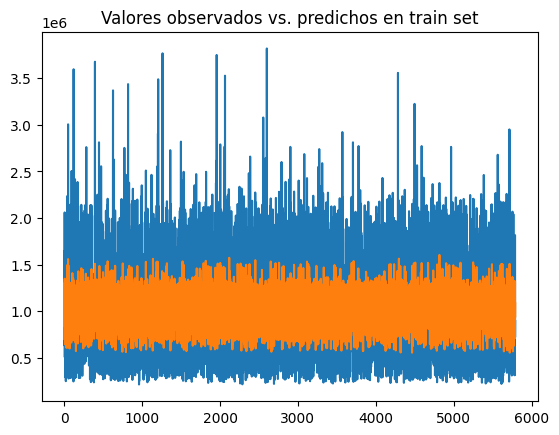

In [748]:
fig, ax = plt.subplots()
ax.plot(y_train.values, )
ax.plot(predicciones_train)
plt.title("Valores observados vs. predichos en train set");

(1000.0, 1500.0)

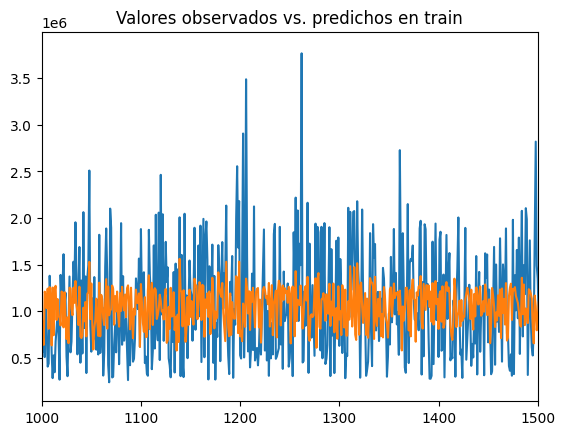

In [749]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train)
plt.title("Valores observados vs. predichos en train");
plt.xlim(1000, 1500)

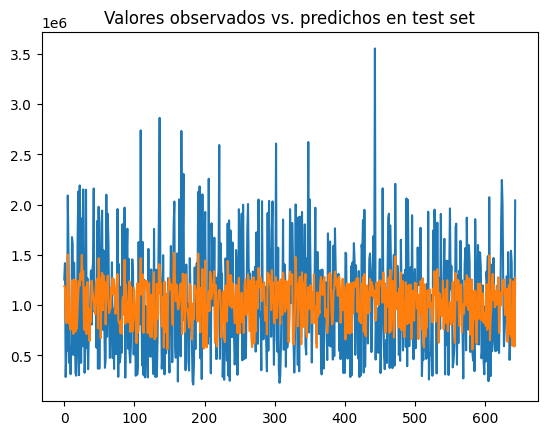

In [750]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test)
plt.title("Valores observados vs. predichos en test set");

In [751]:
from sklearn.preprocessing import StandardScaler

In [752]:
sc = StandardScaler()

In [753]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [754]:
modelo_regresion_std = LinearRegression()
modelo_regresion_std.fit(X_train_std, y_train)

LinearRegression()

In [755]:
predicciones_train_std = modelo_regresion_std.predict(X_train_std)
predicciones_test_std = modelo_regresion_std.predict(X_test_std)

In [756]:
r2_train=r2_score(y_train, predicciones_train)
r2_test=r2_score(y_test, predicciones_test)
print('El R^2 del subconjunto de entrenamiento es:', r2_train,'El R^2 del subconjunto de prueba es:', r2_test)

El R^2 del subconjunto de entrenamiento es: 0.1427554474366871 El R^2 del subconjunto de prueba es: 0.13228920983045545


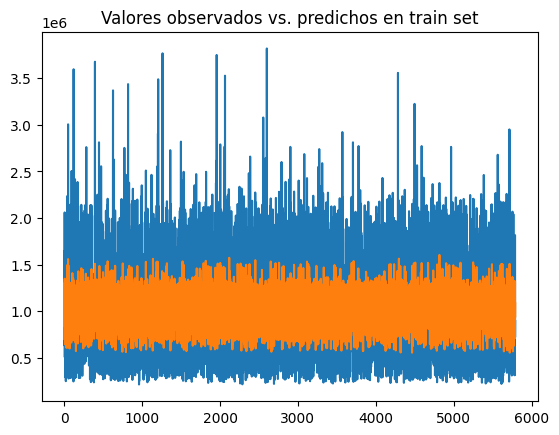

In [757]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train_std)
plt.title("Valores observados vs. predichos en train set");

(1000.0, 1500.0)

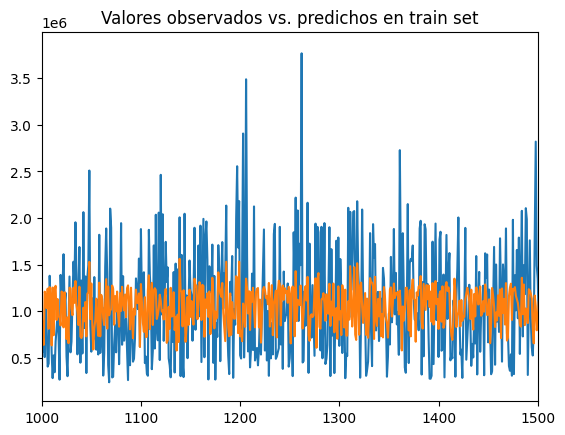

In [758]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train_std)
plt.title("Valores observados vs. predichos en train set");
plt.xlim(1000, 1500)

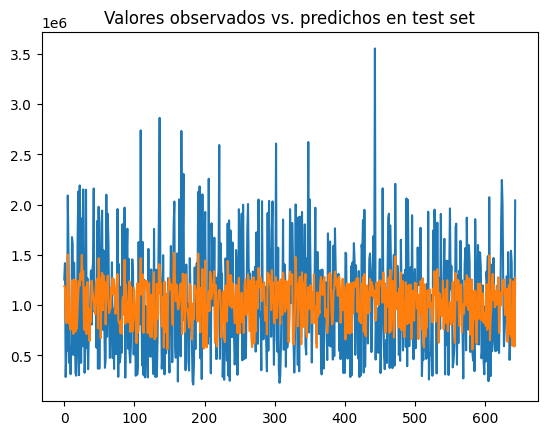

In [759]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test_std)
plt.title("Valores observados vs. predichos en test set");

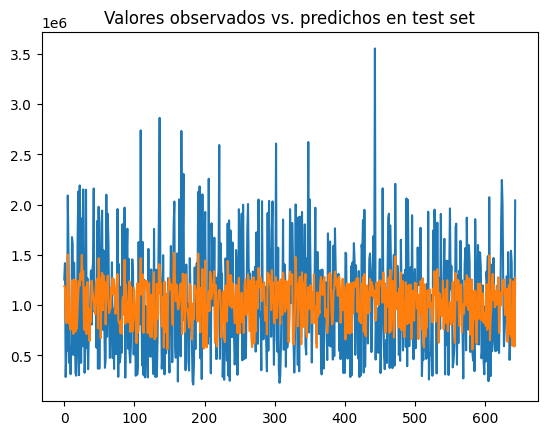

In [760]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test_std)
plt.title("Valores observados vs. predichos en test set");

## 12. Concluya sobre su modelo. Para ello, si escogió el enfoque econométrico, interprete coeficientes, por el contrario si escogió el enfoque de machine learning, determine cuáles son las variables que tienen mayor poder explicativo sobre su variable objetivo.

Las dos variables con mayor poder explicativo en el modelo se pueden identificar observando los valores de importancia. Estos valores indican el impacto de cada variable en la predicción del modelo. En este caso, las dos variables con mayor poder explicativo son las que tienen los valores más extremos (mayor en valor absoluto):

Variable explicativa No. 5: Tiene el valor de importancia más negativo (-201935.18218). Esto sugiere que esta variable tiene una influencia significativa en la predicción del modelo, pero su impacto es negativo.

Variable explicativa No. 1: También tiene un valor de importancia negativo (-92029.45092), lo que indica una influencia importante en la predicción, pero nuevamente con un impacto negativo.

Estos valores negativos en las variables explicativas sugieren que estas dos variables tienen una relación inversa con la variable dependiente (ventas semanales). A medida que aumentan los valores en estas variables, las ventas semanales tienden a disminuir, y viceversa.

In [761]:
from sklearn.preprocessing import StandardScaler

In [762]:
sc=StandardScaler()

In [763]:
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.fit(X_test)

In [764]:
X_train_std

array([[-0.53266939,  1.24154128,  0.30637001, ...,  1.06925911,
         1.23379625, -1.69796771],
       [ 0.73024142, -0.89035287,  0.23857835, ..., -0.82608568,
         0.46430963, -0.72812153],
       [-0.93479556, -1.02918315,  0.94492373, ..., -0.90356832,
        -0.45907431, -1.11606   ],
       ...,
       [ 0.40331392, -1.09069155,  0.77653799, ...,  0.10478978,
        -0.99771494,  1.04184776],
       [-0.24574118,  0.83335434, -1.24190409, ...,  0.79346422,
         0.15651499, -0.77661383],
       [ 0.26678302, -1.00821247, -1.15880463, ..., -1.37279891,
         0.23346365,  1.16307853]])

In [765]:
modelo_regresion_std=LinearRegression()
modelo_regresion_std.fit(X_train_std,y_train)

LinearRegression()

In [766]:
predicciones_train_std=modelo_regresion_std.predict(X_train_std)
predicciones_test_std=modelo_regresion_std.predict(X_test)

In [767]:
r_square_train_std = r2_score(y_train, predicciones_train_std)
r_square_test_std  = r2_score(y_test, predicciones_test_std)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train_std)
print('El R^2 del subconjunto de prueba es:' , r_square_test_std)

El R^2 del subconjunto de entrenamiento es: 0.14275544743668733
El R^2 del subconjunto de prueba es: -1702.9095335493405


In [768]:
importancia = modelo_regresion_std.coef_

<BarContainer object of 7 artists>

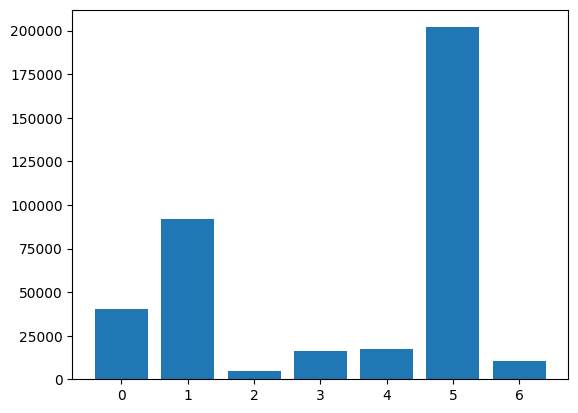

In [769]:
plt.bar([x for x in range(len(importancia))],abs(importancia))

In [770]:
# Resumen
for i,v in enumerate(importancia):
    print('Variable explicativa No. %0d, Score: %.5f' % (i,v))

Variable explicativa No. 0, Score: -40064.31605
Variable explicativa No. 1, Score: -92029.45092
Variable explicativa No. 2, Score: 4654.65729
Variable explicativa No. 3, Score: 16088.45119
Variable explicativa No. 4, Score: -17523.82663
Variable explicativa No. 5, Score: -201935.18218
Variable explicativa No. 6, Score: -10311.06805


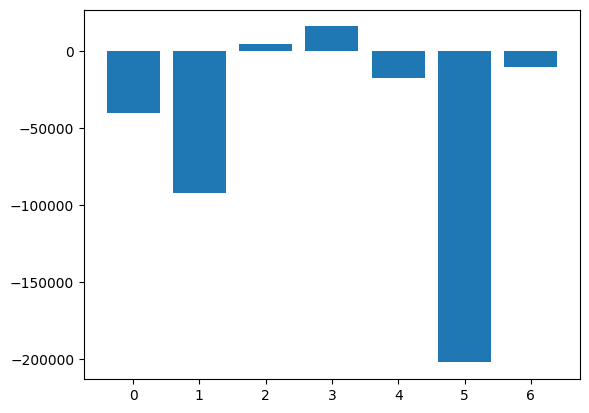

In [771]:
# Graficar la importancia o "feature importance"
plt.bar([x for x in range(len(importancia))], importancia)
plt.show()